In [17]:
import numpy as np
import pandas as pd
import json

meta = pd.read_csv('C:/Users/hs/Desktop/khs/movies_metadata.csv/movies_metadata.csv',dtype= 'unicode' )
meta = meta[['id', 'original_title', 'original_language', 'genres']]
meta = meta.rename(columns={'id':'movieId'})
meta = meta[meta['original_language'] == 'en']
meta.head()

ratings = pd.read_csv('C:/Users/hs/Desktop/khs/ratings_small.csv/ratings_small.csv')
ratings = ratings[['userId', 'movieId', 'rating']]

ratings.head()
ratings.describe()

meta.movieId = pd.to_numeric(meta.movieId, errors='coerce')
ratings.movieId = pd.to_numeric(ratings.movieId, errors='coerce')


def parse_genres(genres_str):
    genres = json.loads(genres_str.replace('\'', '"'))

    genres_list = []
    for g in genres:
        genres_list.append(g['name'])

    return genres_list


meta['genres'] = meta['genres'].apply(parse_genres)

meta.head()

data = pd.merge(ratings, meta, on='movieId', how='inner')

data.head()


matrix = data.pivot_table(index='userId', columns='original_title', values='rating')

matrix.head(20)

GENRE_WEIGHT = 0.1

def pearsonR(s1, s2):
    s1_c = s1 - s1.mean()
    s2_c = s2 - s2.mean()
    
    
    return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))
    


def recommend(input_movie, matrix, n, similar_genre=True):
    input_genres = meta[meta['original_title'] == input_movie]['genres'].iloc(0)[0]

    result = []
    for title in matrix.columns:
        if title == input_movie:
            continue

        # rating comparison
        cor = pearsonR(matrix[input_movie], matrix[title])

        # genre comparison
        if similar_genre and len(input_genres) > 0:
            temp_genres = meta[meta['original_title'] == title]['genres'].iloc(0)[0]

            same_count = np.sum(np.isin(input_genres, temp_genres))
            cor += (GENRE_WEIGHT * same_count)

        if np.isnan(cor):
            continue
        else:
            result.append((title, '{:.2f}'.format(cor), temp_genres))

    result.sort(key=lambda r: r[1], reverse=True)

    return result[:n]

recommend_result = recommend('Topaz', matrix, 10, similar_genre=True)

pd.DataFrame(recommend_result, columns = ['Title', 'Correlation', 'Genre'])

<ipython-input-17-d2931f37162f>:51: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))


,Title,Correlation,Genre
0,Lara Croft Tomb Raider: The Cradle of Life,0.88,"[Action, Adventure, Fantasy, Thriller]"
1,In the Bedroom,0.87,"[Drama, Thriller]"
2,Requiem,0.87,"[Action, Horror, Thriller]"
3,Shattered,0.86,"[Mystery, Thriller]"
4,Die Hard: With a Vengeance,0.85,"[Action, Thriller]"
5,The Flintstones,0.83,"[Fantasy, Comedy, Family]"
6,To End All Wars,0.83,"[Action, Comedy, Drama, History]"
7,Star Trek VI: The Undiscovered Country,0.82,"[Science Fiction, Action, Adventure, Thriller]"
8,Body of Evidence,0.78,"[Drama, Thriller, Romance]"
9,Ludwig,0.78,"[Drama, History]"


In [31]:
data_file = open("C:/Users/hs/Desktop/hand_write/mnist_dataset.csv", "r")
data_list = data_file.readlines()
data_file.close()

In [32]:
len(data_list)

100

In [33]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [48]:
import numpy 
from  matplotlib import pyplot 
%matplotlib inline

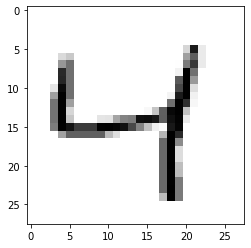

In [50]:
all_values = data_list[2].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
pyplot.imshow(image_array, cmap="Greys", interpolation="None")
pyplot.show()

In [51]:
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [52]:
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [53]:
print(targets)

[0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01]


In [2]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [30]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline
 
#신경망 클래스의 정의
class neuralNetwork:
    
    #신경망 초기화하기
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #입력, 은닉, 출력 계층의 노드 개수 설정
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #가중치 행렬 wih와 who -> 정규분포의 중심은 0.0으로 설정, 표준편차는 노드로 들어오는 연결 노드의 개수에 루트를 씌우고 역수를 취함(pow함수)
        #배열 내 가중치는 w_i_j로 표기. 노드 i에서 다음 계층의 j로 연결됨을 의미
        #w11 w21
        #w12 w22 등
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
 
        #학습률
        self.lr = learningrate
        
        #활성화 함수는 시그모이드 함수를 이용
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    def train(self, inputs_list, targets_list):
        
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        # 오차는 (실제 값 = 계산 값)
        output_errors = targets - final_outputs
        
        # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # 은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who += self.lr*numpy.dot((output_errors*final_outputs*(1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # 입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih += self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        
        
        pass
    
    def query(self, inputs_list):
        
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih,inputs)
        # 은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        
#입력, 은닉, 출력 노드의 수
input_nodes = 784 #손글씨 숫자 이미지를 구성하는 픽셀이 28x28의 크기를 가지기 때문
hidden_nodes = 100 #입력 값의 수보다 작은 값을 선택함으로써 신경망이 주요 특징을 찾아낸다, 너무 적은 수의 은닉 계층 노드를 선택한다면 제한적이 될 수도 있다
output_nodes = 10 #0~9까지의 레이블을 구분해야 하므로 출력은 10개면 충분하다.
 
#학습률은 0.3으로 정의
learning_rate = 0.3
#신경망의 인스턴스를 생성
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
 
#데이터를 불러오고 그 파일을 읽는다.
training_data_file = open("C:/Users/hs/Desktop/hand_write/mnist_dataset.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()
     
# 테스트 데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(',')
    
    # 입력 값의 범위와 값 조정
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 신경망에 질의
    targets = numpy.zeros(output_nodes) + 0.01
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    
    targets[int(all_values[0])] = 0.99
    
    # 정답 또는 오답을 리스트에 추가
    
    n.train(inputs, targets)
    
     
    
    
    pass

#학습 데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:
    #레코드를 쉼표에 의해 분리
    all_values = record.split(',') #split는 구분자로 사용할 기호를 그 매개변수로 가진다. 리스트를 불러와서 쉼표로 구분하여 분리
    #입력 값의 범위와 값 조정
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    #결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
    targets = numpy.zeros(output_nodes) + 0.01
    #all_values[0]은 이 레코드에 대한 결과 값
    targets[int(all_values[0])] = 0.99
    n.train(inputs,targets)
 
    pass

 

        

5


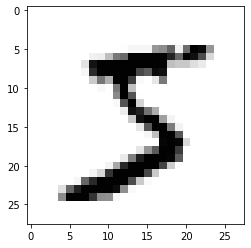

In [31]:
test_data_file = open("C:/Users/hs/Desktop/hand_write/mnist_dataset.csv")
test_data_list = test_data_file.readlines()
test_data_file.close()
 
all_values = test_data_list[0].split(',')
print(all_values[0])
 
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [20]:
n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)

array([[0.0477559 ],
       [0.10061685],
       [0.07054862],
       [0.30617516],
       [0.00808636],
       [0.25369723],
       [0.00660738],
       [0.00743153],
       [0.03497563],
       [0.00086795]])

In [32]:
#신경망 테스트
 
#신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []
 
#테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
    #레코드를 쉼표에 의해 분리
    all_values = record.split(',')
    #정답은 첫 번째 값
    correct_label = int(all_values[0])
    print(correct_label,"correct label")
    #입력 값의 범위와 값 조정
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    #신경망에 질의
    outputs = n.query(inputs)
    #가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = numpy.argmax(outputs)
    print(label, "network's answer")
    #정답 또는 오답을 리스트에 추가
    if(label == correct_label):
        #정답인 경우 성적표에 1을 더함
        scorecard.append(1)
    else:
        #정답이 아닌 경우 성적표에 0을 더함
        scorecard.append(0)
        pass
    pass
 
print(scorecard)

5 correct label
3 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
2 correct label
2 ne

In [33]:
#스코어 평균
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum()/scorecard_array.size)

performance =  0.95


In [34]:
epochs = 7
 
#신경망 학습시키기
for e in range(epochs):
    #학습 데이터 모음 내의 모든 레코드 탐색
    for record in training_data_list:
        #레코드를 쉼표에 의해 분리
        all_values = record.split(',') #split는 구분자로 사용할 기호를 그 매개변수로 가진다. 리스트를 불러와서 쉼표로 구분하여 분리
        #입력 값의 범위와 값 조정
        inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
        #결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
        targets = numpy.zeros(output_nodes) + 0.01
        #all_values[0]은 이 레코드에 대한 결과 값
        targets[int(all_values[0])] = 0.99
        n.train(inputs,targets)
 
        pass

In [35]:
#신경망 테스트
 
#신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []
 
#테스트 데이터 모음 내의 모든 레코드 탐색
for record in test_data_list:
    #레코드를 쉼표에 의해 분리
    all_values = record.split(',')
    #정답은 첫 번째 값
    correct_label = int(all_values[0])
    print(correct_label,"correct label")
    #입력 값의 범위와 값 조정
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    #신경망에 질의
    outputs = n.query(inputs)
    #가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = numpy.argmax(outputs)
    print(label, "network's answer")
    #정답 또는 오답을 리스트에 추가
    if(label == correct_label):
        #정답인 경우 성적표에 1을 더함
        scorecard.append(1)
    else:
        #정답이 아닌 경우 성적표에 0을 더함
        scorecard.append(0)
        pass
    pass
 
print(scorecard)

5 correct label
5 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
2 correct label
2 ne

In [36]:
#스코어 평균
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum()/scorecard_array.size)

performance =  1.0
